In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor

In [2]:
data = pd.read_csv('../train.csv')

In [3]:
data.head()

,blueFirstBlood,blueKills,blueDeaths,blueGoldDiff,blueExperienceDiff,blueWardsPlacedDiff,blueWardsDestroyedDiff,blueAvgLevelDiff,blueAssistsDiff,blueTotalMinionsKilledDiff,blueTotalJungleMinionsKilledDiff,blueEliteMonstersDiff,blueDragonsDiff,blueHeraldsDiff,blueTowersDestroyedDiff,blueWins
0,0,5,3,976,1599,-21,2,0.4,1,10,19,1,1,0,0,1
1,1,5,4,780,523,-16,0,-0.2,0,0,12,2,1,0,0,1
2,0,6,14,-4443,-4140,1,0,-1.0,-5,-27,-20,-1,-1,0,0,1
3,0,4,7,-1903,-584,-25,-1,0.0,-8,-10,-17,-1,-1,0,0,0
4,0,5,10,-3731,-1458,10,1,-0.6,-3,-25,-5,-1,-1,0,0,1


In [4]:
data = data.iloc[:,:-1]

In [5]:
data

,blueFirstBlood,blueKills,blueDeaths,blueGoldDiff,blueExperienceDiff,blueWardsPlacedDiff,blueWardsDestroyedDiff,blueAvgLevelDiff,blueAssistsDiff,blueTotalMinionsKilledDiff,blueTotalJungleMinionsKilledDiff,blueEliteMonstersDiff,blueDragonsDiff,blueHeraldsDiff,blueTowersDestroyedDiff
0,0,5,3,976,1599,-21,2,0.4,1,10,19,1,1,0,0
1,1,5,4,780,523,-16,0,-0.2,0,0,12,2,1,0,0
2,0,6,14,-4443,-4140,1,0,-1.0,-5,-27,-20,-1,-1,0,0
3,0,4,7,-1903,-584,-25,-1,0.0,-8,-10,-17,-1,-1,0,0
4,0,5,10,-3731,-1458,10,1,-0.6,-3,-25,-5,-1,-1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6910,0,10,4,3301,3347,1,0,1.0,0,36,15,-1,-1,0,0
6911,0,6,5,503,-194,34,-1,-0.4,2,19,-44,-2,-1,1,0
6912,0,1,2,99,-174,3,1,0.2,-4,34,-4,1,1,0,0
6913,0,3,11,-4452,-3726,26,-1,-0.6,-4,-48,-13,0,-1,0,0


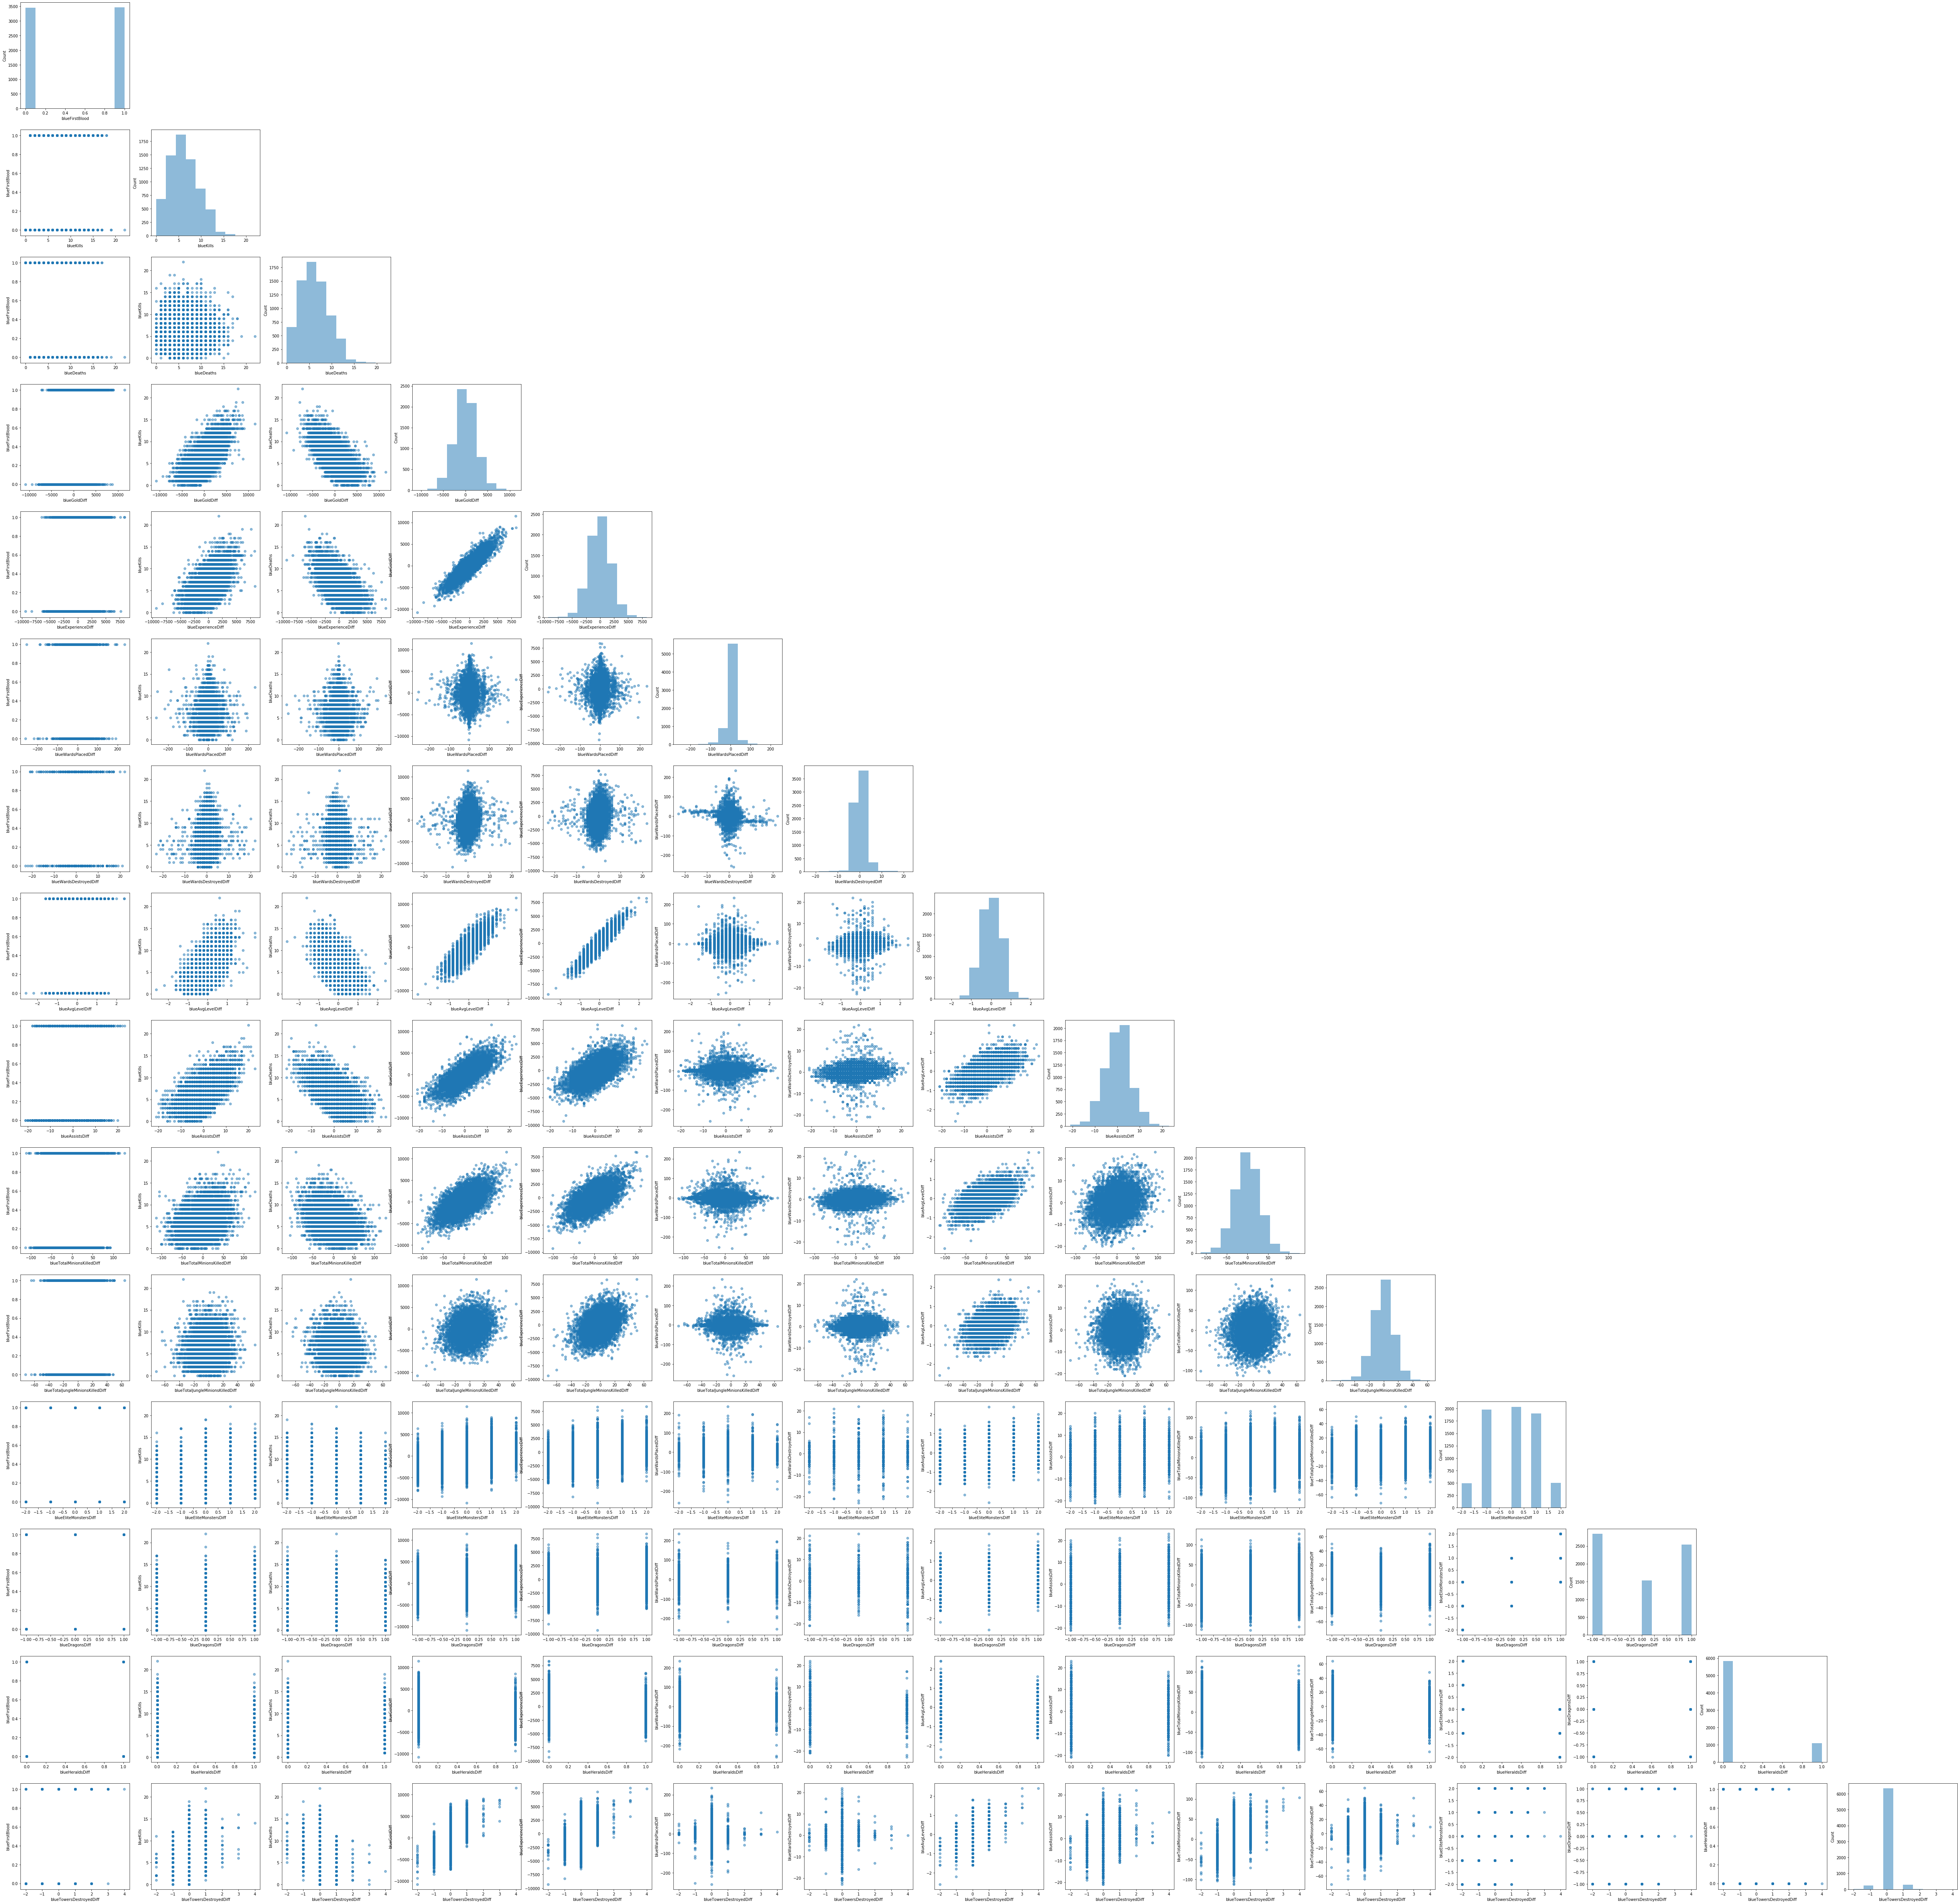

In [6]:
scatterplotmatrix(data.values, figsize=(90,90),names=data.columns, alpha=0.5)
plt.show()

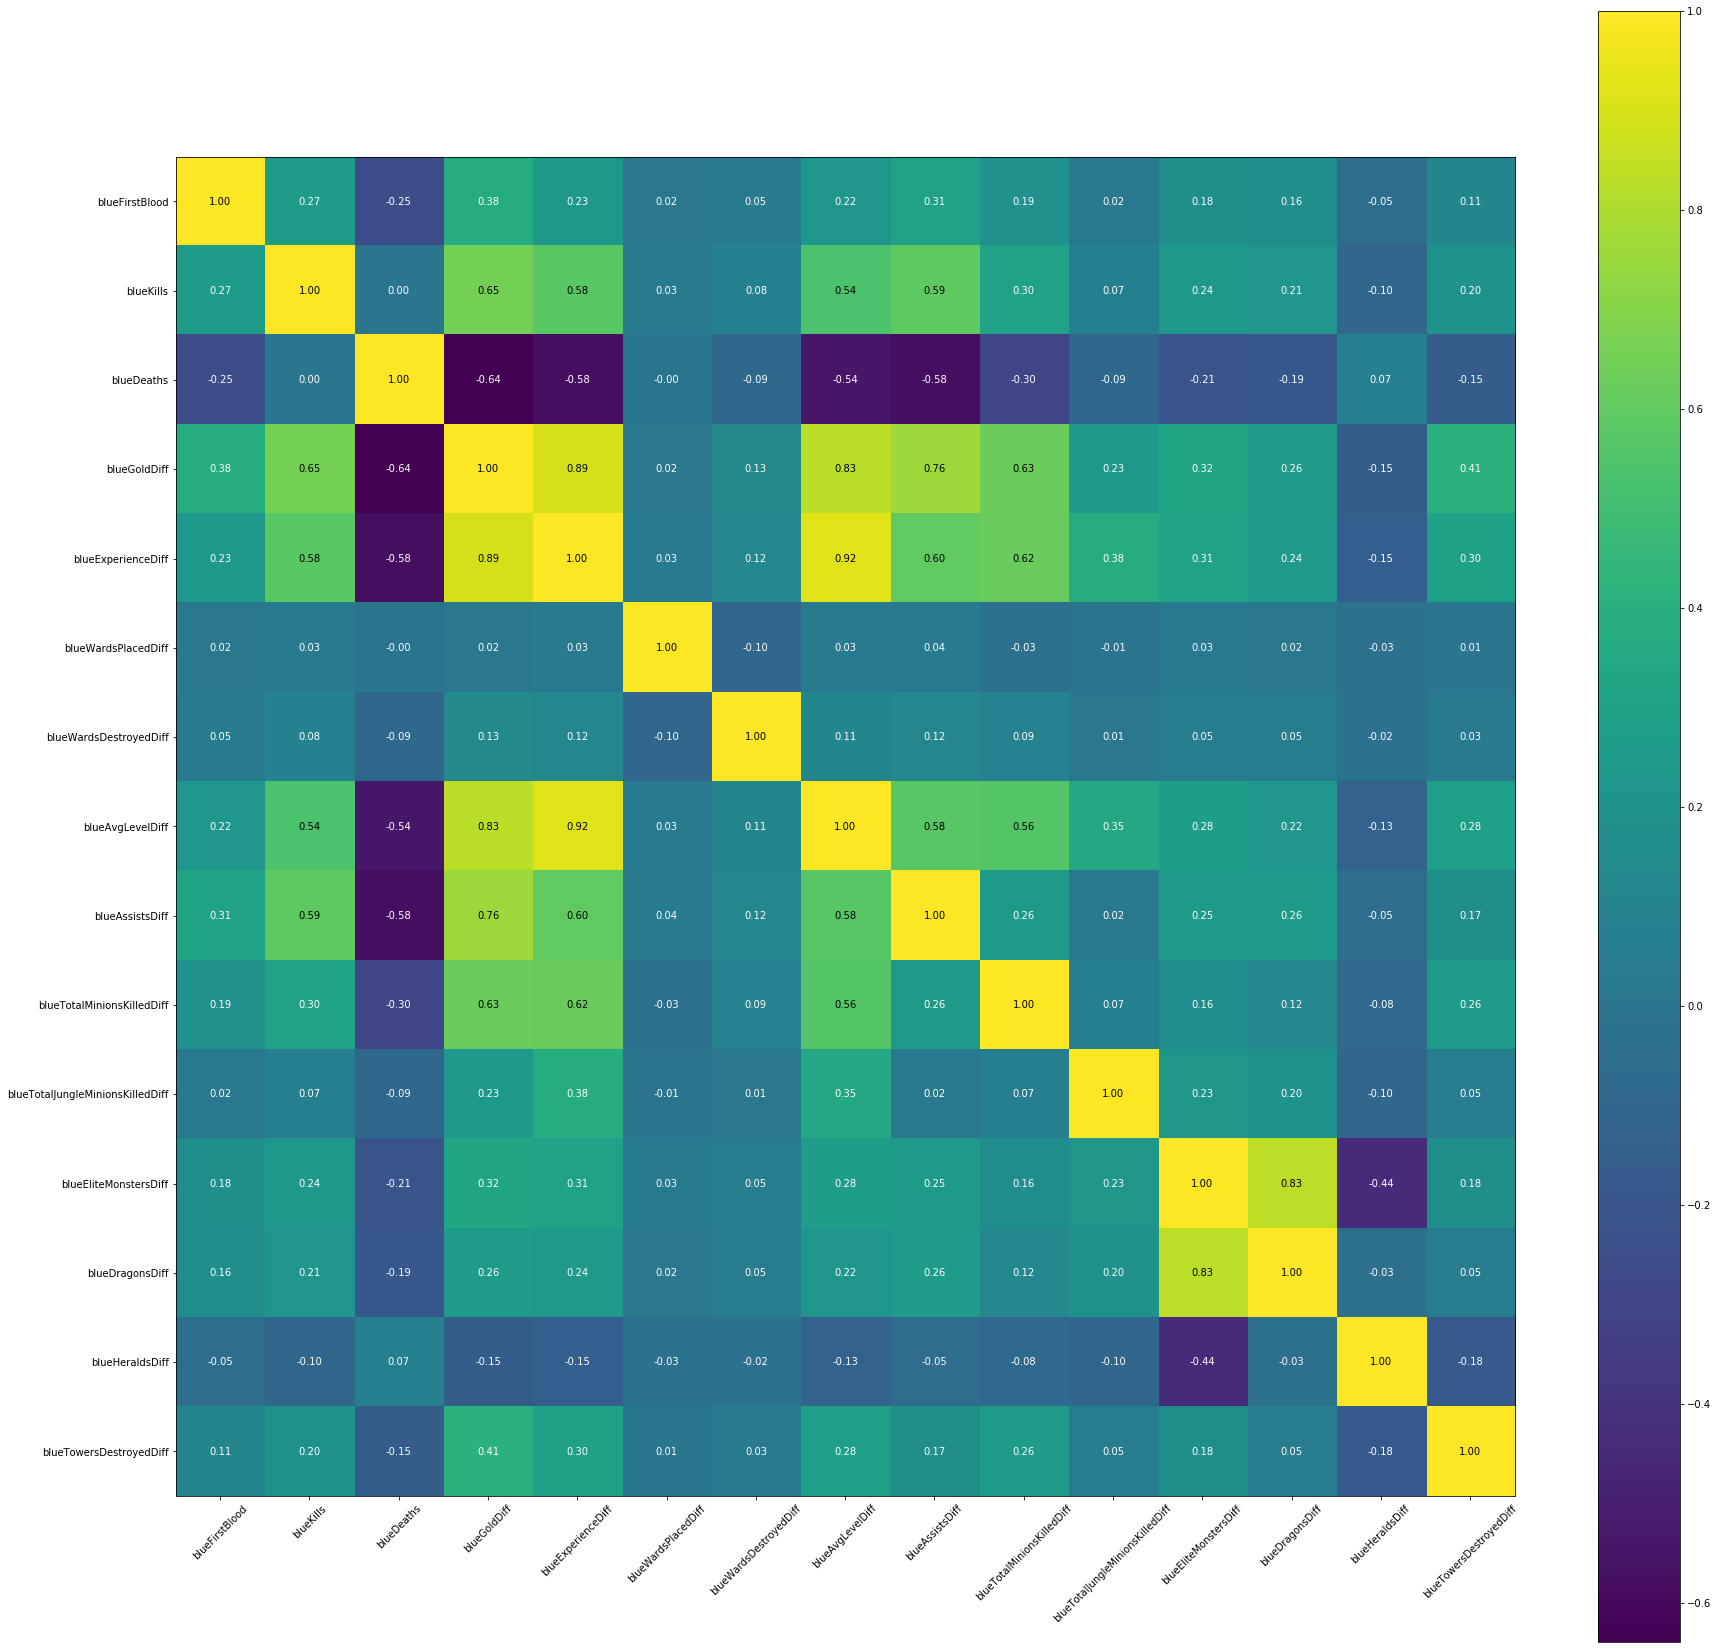

In [7]:
cm = np.corrcoef(data.values.T)
hm = heatmap(cm, row_names=data.columns, column_names=data.columns, figsize=(30,30))
plt.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6915 entries, 0 to 6914
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   blueFirstBlood                    6915 non-null   int64  
 1   blueKills                         6915 non-null   int64  
 2   blueDeaths                        6915 non-null   int64  
 3   blueGoldDiff                      6915 non-null   int64  
 4   blueExperienceDiff                6915 non-null   int64  
 5   blueWardsPlacedDiff               6915 non-null   int64  
 6   blueWardsDestroyedDiff            6915 non-null   int64  
 7   blueAvgLevelDiff                  6915 non-null   float64
 8   blueAssistsDiff                   6915 non-null   int64  
 9   blueTotalMinionsKilledDiff        6915 non-null   int64  
 10  blueTotalJungleMinionsKilledDiff  6915 non-null   int64  
 11  blueEliteMonstersDiff             6915 non-null   int64  
 12  blueDr

In [72]:
X = data[data.columns.difference(['blueGoldDiff'])]
y = data['blueGoldDiff']

In [73]:
X.shape

(6915, 14)

In [74]:
y.describe()

count     6915.000000
mean        19.731743
std       2451.507571
min     -10830.000000
25%      -1558.500000
50%          2.000000
75%       1605.000000
max      11467.000000
Name: blueGoldDiff, dtype: float64

Text(0.5, 1.0, 'Distribution of blueGoldDiff')

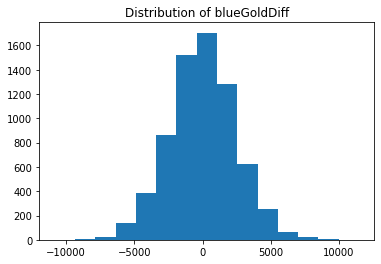

In [75]:
plt.hist(y,bins=15)
plt.title('Distribution of blueGoldDiff')

# Lasso

251108.76923395693


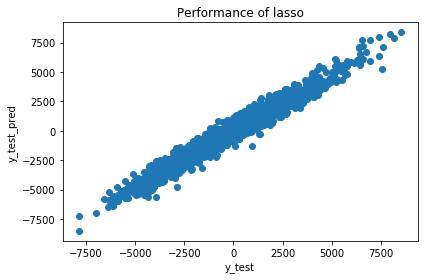

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lasso = Lasso(random_state=42)
lasso.fit(X_train,y_train)
y_test_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)
plt.scatter(y_test, y_test_pred)
plt.title('Performance of lasso')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.tight_layout()

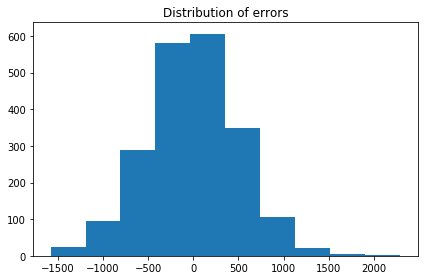

In [77]:
plt.hist(y_test-y_test_pred)
plt.title('Distribution of errors')
plt.tight_layout()

In [84]:
X = data[data.columns.difference(['blueGoldDiff'])]
y = data['blueGoldDiff']

sc = StandardScaler()
X_sc = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)
lasso = Lasso(random_state=42)
lasso.fit(X_train,y_train)
y_test_pred = lasso.predict(X_test)
y_train_pred = lasso.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

250919.78957446507


# Ridge

250913.55171901098


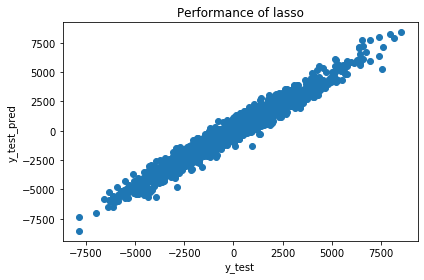

In [86]:
X = data[data.columns.difference(['blueGoldDiff'])]
y = data['blueGoldDiff']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
ridge = Ridge(random_state=42)
ridge.fit(X_train,y_train)
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)
plt.scatter(y_test, y_test_pred)
plt.title('Performance of lasso')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')
plt.tight_layout()

In [88]:
X = data[data.columns.difference(['blueGoldDiff'])]
y = data['blueGoldDiff']

sc = StandardScaler()
X_sc = sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.3, random_state=42)
ridge = Ridge(random_state=42)
ridge.fit(X_train,y_train)
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
print(mse)

250900.85923226248


# Reression

In [89]:
X = data[data.columns.difference(['blueGoldDiff'])]
y = data['blueGoldDiff']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
lr = LinearRegression()
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

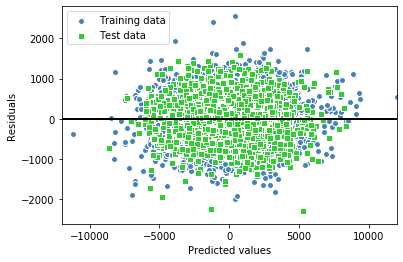

In [90]:
plt.scatter(y_train_pred, y_train_pred - y_train,c='steelblue', marker='o', edgecolor='white',label='Training data')
plt.scatter(y_test_pred, y_test_pred - y_test,c='limegreen', marker='s', edgecolor='white',label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-12000, xmax=12000, color='black', lw=2)
plt.xlim([-12000, 12000])
plt.show()

In [91]:
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred),
                                       mean_squared_error(y_test, y_test_pred)))

MSE train: 260335.294, test: 250903.936


In [92]:
print('R^2 train: %.3f, test: %.3f' %
        (r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

R^2 train: 0.957, test: 0.957
